En este notebook desarrollaremos el test AB a través de distribuciones beta y apoyándonos en la Regla de Bayes.

Esta metodología nos permite llevar nuestro testeo un nivel más allá y, además, la comprensión del proceso es más sencilla.

No obstante, desde un punto de vista matemático, el proceso es más complejo y deberemos construir diferentes funciones que nos permitan alcanzar el objetivo. Estas funciones podemos encontrarlas en la carpeta libreria_bayes de este mismo repositorio, la cual contiene código desarrollado por [Yonatan Rodriguez Alvarez](https://github.com/YonatanRA).

In [1]:
from libreria_bayes.bayes_func import *

import pandas as pd

Definimos los datos que necesitamos.

Para utiliar este método no necesitamos los datos de la muestra como tal. Será suficiente con definir los resultados obtenidos en cada grupo (grupo de control y grupo de tratamiento).

In [2]:
data = pd.read_csv('data/cookie_cats.csv')

In [3]:
# Obtenemos el número de observaciones para cada grupo.

data.version.value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

Comenzaremos testeando la retención en un periodo de tiempo de un día (retention_1 en nuestro dataset).

In [4]:
# Obtenemos la cantidad de retenciones por grupo.

data.groupby('version')['retention_1'].value_counts()

version  retention_1
gate_30  False          24666
         True           20034
gate_40  False          25370
         True           20119
Name: retention_1, dtype: int64

In [5]:
control_users = 44700
treatement_users = 45489

control_retentions = 20034
treatement_retentions = 20119

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# Observamos como el ratio para el grupo de tratamiento es menor al de control.
# Esto ya nos da indicios de que los cambios no están funcionando.
# Comprobamos si esta diferencia es estadísticamente significativa.

('Rates: ', 0.4481879194630872, 0.44228274967574577)

In [6]:
# Creamos los betas a priori:

a_C, b_C = control_retentions +1, control_users - control_retentions +1
a_T, b_T = treatement_retentions +1, treatement_users - treatement_retentions +1


beta_C = beta(a_C, b_C)   # control 
beta_T = beta(a_T, b_T)   # treatement (grupo de testeo)

In [7]:
# Calculamos la diferencia en entre la media de las betas (grupo de tratamiento vs. grupo de control)

difference = (beta_T.mean()-beta_C.mean())/beta_C.mean()

difference

-0.013175098158249857

In [8]:
# Calculamos la probabilidad (nivel de significación de la diferencia obtenida):

prob = calc_prob(beta_T, beta_C)

prob

0.037206025180329845

In [9]:
# Resultado del test:

'El test disminuye la tasa de retención en un {:2.2f}%, con una probabilidad del {:2.2f}%. Esta probabilidad es demasiado baja como para considerar que existe una diferencia significativa.'.format(difference*100, prob*100)

'El test disminuye la tasa de retención en un -1.32%, con una probabilidad del 3.72%. Esta probabilidad es demasiado baja como para considerar que existe una diferencia significativa.'

0.4481879194630872 0.44228274967574577


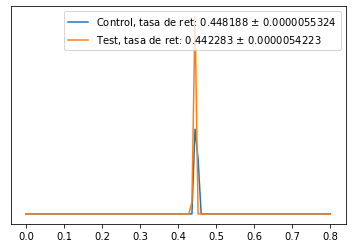

In [10]:
print (control_ret_rate, treatement_ret_rate)

plot([beta_C, beta_T], ['Control', 'Test'])

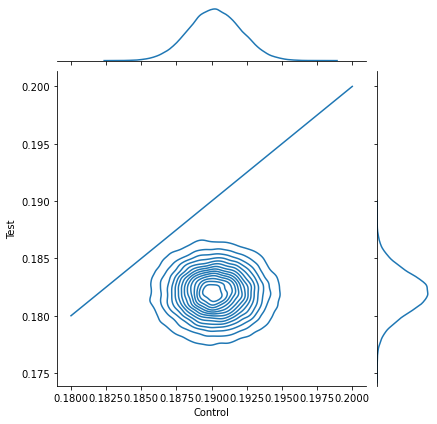

In [22]:
import seaborn as sns

val_C=np.random.beta(a_C, b_C, 50000)
val_T=np.random.beta(a_T, b_T, 50000)

vals=np.vstack([val_C, val_T]).T
limit=0.2

df=pd.DataFrame(vals, columns=['Control','Test'])
df=df[df.Control<limit]
df=df[df.Test<limit]


g=sns.jointplot(x=df.Control, y=df.Test, kind='kde', n_levels=15)
g.ax_joint.plot([0.18, limit], [0.18, limit])
plt.show();

Conclusiones del test para retention_1:

*Según los resultados del test, no podemos afirmar que exista una diferencia significativa entre la retención del grupo de control y el grupo de tratamiento.*

*Podemos afirmar que la implementación de los cambios propuestos no impactará de manera significativa en la tasa de retención y, por tanto, no se recomienda llevarlos a cabo.*

Repetimos el proceso sobre los resultados de retención a siete días (retention_7 en nuestro dataset).

In [12]:
# La cantidad de observaciones sigue siendo la misma que en el caso anterior (control = 44.700; tratamiento = 45.489)

# Obtenemos la cantidad de retenciones por grupo.

data.groupby('version')['retention_7'].value_counts()

version  retention_7
gate_30  False          36198
         True            8502
gate_40  False          37210
         True            8279
Name: retention_7, dtype: int64

In [13]:
control_users_7 = 44700
treatement_users_7 = 45489

control_retentions_7 = 8502
treatement_retentions_7 = 8279

control_ret_7_rate = control_retentions_7 / control_users_7

treatement_ret_7_rate = treatement_retentions_7 / treatement_users_7

'Rates: ', control_ret_7_rate, treatement_ret_7_rate

# Observamos como el ratio de retención es más favorable en el grupo de control, por lo que los cambios propuestos pueden no estar obteniendo el resultado esperado.
# Comprobamos si esta diferencia es estadísticamente significativa.

('Rates: ', 0.19020134228187918, 0.18200004396667327)

In [14]:
# Creamos los betas a priori:

a_C, b_C = control_retentions_7 +1, control_users_7 - control_retentions_7 +1
a_T, b_T = treatement_retentions_7 +1, treatement_users_7 - treatement_retentions_7 +1


beta_C = beta(a_C, b_C)   # control 
beta_T = beta(a_T, b_T)   # treatement (grupo de testeo)

In [15]:
# Calculamos la diferencia entre la media de las betas (grupo de tratamiento vs. grupo de control)

difference_7 = (beta_T.mean()-beta_C.mean())/beta_C.mean()

difference_7

-0.04311526114658881

In [16]:
# Calculamos la probabilidad (nivel de significación de la diferencia obtenida):

prob = calc_prob(beta_T, beta_C)

prob

0.0007773386645759051

In [17]:
# Resultado del test:

'El test aumenta la tasa de retención en un {:2.2f}%, con una probabilidad del {:2.2f}%. Obtenemos una probabilidad muy baja (casi 0), por lo que realmente no existe una diferencia significativa.'.format(difference*100, prob*100)

'El test aumenta la tasa de retención en un -1.32%, con una probabilidad del 0.08%. Obtenemos una probabilidad muy baja (casi 0), por lo que realmente no existe una diferencia significativa.'

0.19020134228187918 0.18200004396667327


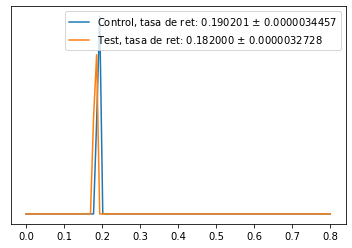

In [18]:
print (control_ret_7_rate, treatement_ret_7_rate)

plot([beta_C, beta_T], ['Control', 'Test'])

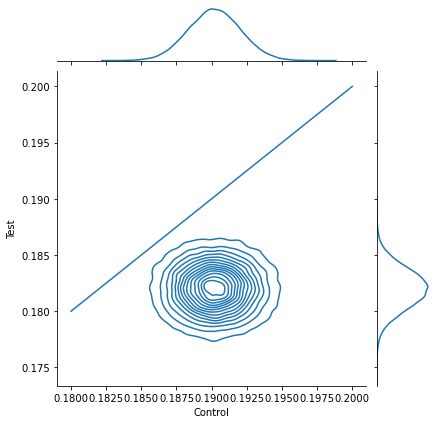

In [23]:
val_C=np.random.beta(a_C, b_C, 50000)
val_T=np.random.beta(a_T, b_T, 50000)

vals=np.vstack([val_C, val_T]).T
limit=0.2

df=pd.DataFrame(vals, columns=['Control','Test'])
df=df[df.Control<limit]
df=df[df.Test<limit]


g=sns.jointplot(x=df.Control, y=df.Test, kind='kde', n_levels=15)
g.ax_joint.plot([0.18, limit], [0.18, limit])
plt.show();

Conclusiones del test para retention_7:

*Llegamos a las mismas conclusiones que en retention_1.*

*Según los resultados del test, no podemos afirmar que exista una diferencia significativa entre la retención del grupo de control y el grupo de tratamiento.*

*Podemos afirmar que la implementación de los cambios propuestos no impactará de manera significativa en la tasa de retención y, por tanto, no se recomienda llevarlos a cabo.*